In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.fft import fft, fftfreq
from scipy.signal import argrelextrema

[-20.   -18.75 -17.5  ...  17.5   18.75  20.  ]


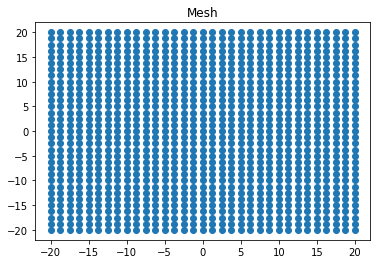

In [9]:


def get_frecuency(xf,ite):
    erroak=[]
    dif=0
    # for local minima
    minima=argrelextrema(xf,np.less)[0]
    for inde in minima:
            erroak.append(ite[inde])
            for i in range(len(erroak)-1):
                dif+=erroak[i+1]-erroak[i]
    print(erroak)
    return dif/len(erroak)


def MeshGenerator(pointDis,MeshSize):
    
    pausux=pointDis
    pausuy=pointDis
    numx=round(MeshSize/pointDis)
    numy=round(MeshSize/pointDis)
    if(np.mod(numx,2)==0):
        numx+=1
    if(np.mod(numy,2)==0):
        numy+=1
    x=np.zeros(numx*numy)
    y=np.zeros(numy*numy)
    for i in range(numx):
        for j in range(numy):
            x[j+numx*i]=pausux*i-MeshSize/2
            y[j+numy*i]=pausuy*j-MeshSize/2
    fig,plot=plt.subplots()
    plot.set_title("Mesh")
    plot.scatter(x,y)
pointDis=1.25
MeshSize=40
MeshGenerator(pointDis,MeshSize)